In [140]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
symbols = ['ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TITAN.NS']

start_date = '2012-01-01'
end_date = '2022-01-01'  
current_date = '2024-01-01'
all_data = pd.DataFrame()

In [142]:

for symbol in symbols:

    data = yf.download(symbol, start=start_date, end=end_date)

    data = data[['Close']]  
    data.columns = [symbol]  

    if all_data.empty:
        all_data = data
    else:
        all_data = all_data.join(data, how='outer')


all_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,ASIANPAINT.NS,BAJAJ-AUTO.NS,HCLTECH.NS,INFY.NS,TCS.NS,TITAN.NS
Date,,,,,,
2021-12-27,3272.399902,3154.100098,1267.199951,1866.150024,3696.100098,2331.300049
2021-12-28,3368.199951,3176.050049,1283.900024,1888.000000,3706.550049,2379.850098
2021-12-29,3367.449951,3262.500000,1291.900024,1885.550049,3694.699951,2402.149902
2021-12-30,3365.699951,3200.800049,1317.050049,1892.849976,3733.750000,2437.300049
2021-12-31,3382.949951,3249.250000,1319.099976,1887.750000,3738.350098,2522.399902


In [143]:

# Calculate log returns for all stocks
log_returns = np.log(all_data / all_data.shift(1))

# Define rolling window for volatility calculation
rolling_window_days = 21
volatility = log_returns.rolling(window=rolling_window_days).std() * np.sqrt(252)


In [144]:
# Initialize parameters
T = 2  # Time period
n_time_intervals = 730
n_simulations = 20
delta_t = T / n_time_intervals


Stock price forecast for ASIANPAINT.NS: 8.25%
Stock price forecast for BAJAJ-AUTO.NS: 7.33%
Stock price forecast for HCLTECH.NS: 2.39%
Stock price forecast for INFY.NS: 19.47%
Stock price forecast for TCS.NS: 12.52%
Stock price forecast for TITAN.NS: 5.52%
            ASIANPAINT.NS  BAJAJ-AUTO.NS   HCLTECH.NS      INFY.NS  \
2022-01-01    3382.949951    3249.250000  1319.099976  1887.750000   
2022-01-02    3394.919796    3255.370641  1318.048302  1883.095798   
2022-01-03    3405.856182    3265.925312  1318.044233  1883.758865   
2022-01-04    3411.358138    3279.620988  1321.727215  1880.312120   
2022-01-05    3418.611485    3272.317304  1321.372791  1886.581402   

                 TCS.NS     TITAN.NS  
2022-01-01  3738.350098  2522.399902  
2022-01-02  3735.456595  2523.825589  
2022-01-03  3739.891294  2531.779023  
2022-01-04  3732.565070  2512.178182  
2022-01-05  3743.876544  2511.757639  


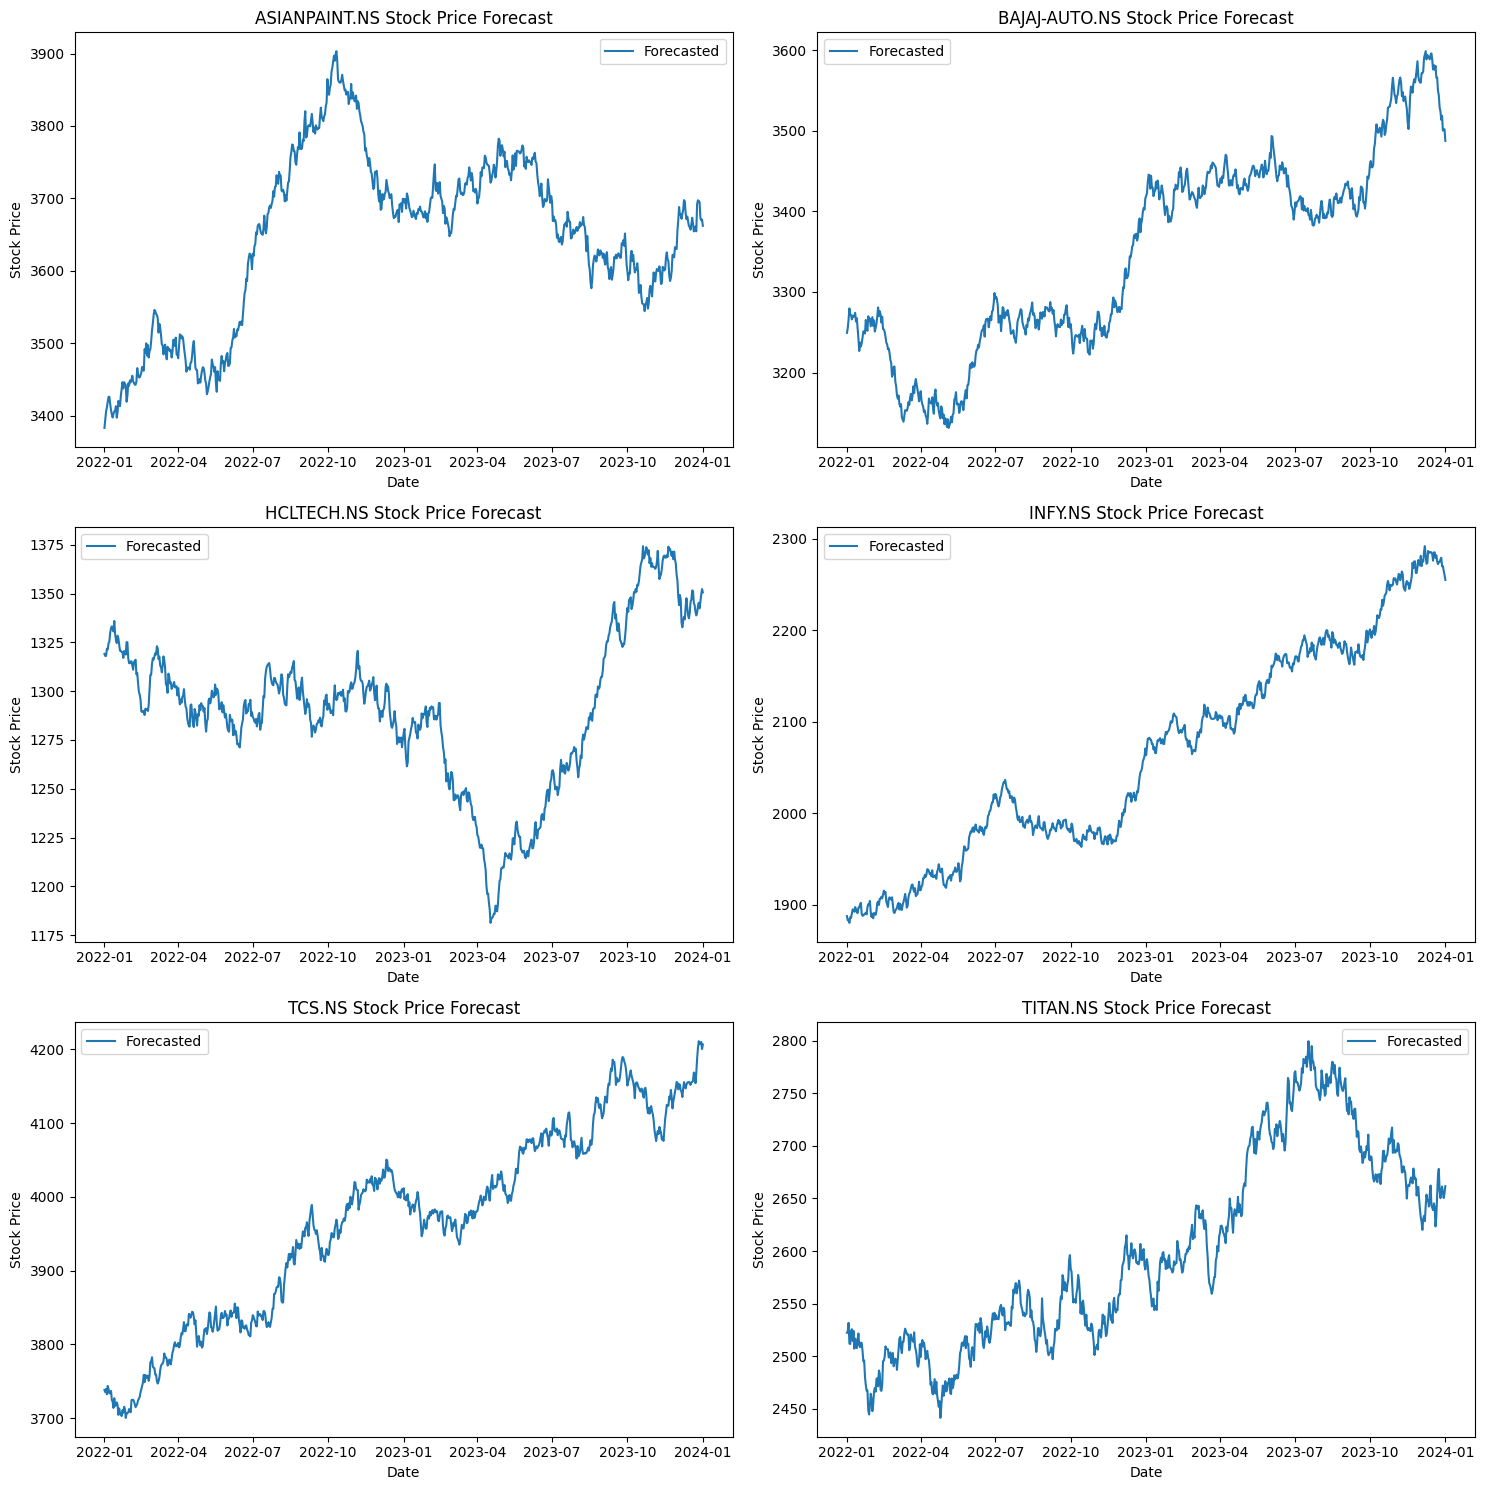

In [145]:
predicted_data = pd.DataFrame(index=pd.date_range(start=end_date, periods=n_time_intervals+1, freq='D'))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, symbol in enumerate(symbols):
    S0 = all_data[symbol].iloc[-1]  # Most recent stock price
    vol = volatility[symbol].iloc[-1]  # Most recent volatility
    rf = 0.06971  # Assuming a risk-free rate of 6.971%

    # Initialize stock price array
    S_fwd = np.zeros((n_time_intervals + 1, n_simulations))
    S_fwd[0] = S0

    # Run the simulation
    for t in range(1, n_time_intervals + 1):
        S_fwd[t] = S_fwd[t - 1] * np.exp((rf - 0.5 * vol**2) * delta_t + vol * np.sqrt(delta_t) * np.random.standard_normal(n_simulations))

    # mean_scenario = S_fwd.mean(axis=1)
    mean_scenario = S_fwd.mean(axis=1)
    predicted_data[symbol] = mean_scenario

    # Calculate forecast percentage based on the mean scenario
    delta_stock_price = (mean_scenario[-1] - S0) / S0
    delta_stock_price_percentage = "{:.2%}".format(delta_stock_price)
    print(f"Stock price forecast for {symbol}: {delta_stock_price_percentage}")
    # actual_data = yf.download(symbol, start=end_date, end=current_date)
    # actual_prices = actual_data['Close']
    # print(actual_prices.head())
    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=end_date, periods=n_time_intervals+1, freq='D')

    # Plot the forecasted mean scenario and actual prices
    axes[i].plot(forecast_dates, mean_scenario, label='Forecasted')
    # axes[i].plot(actual_prices.index, actual_prices.values, label='Actual', linestyle='--')
    axes[i].set_title(f"{symbol} Stock Price Forecast")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Stock Price")
    axes[i].legend()
print(predicted_data.head())
predicted_data.to_csv("predicted_stock_prices.csv")

# Adjust layout and show plots
plt.tight_layout()
plt.show()